In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from matplotlib import pyplot as plt
import tensorflow as tf
import joblib as jl
import numpy as np
import cv2
import os

print(f'numpy version : {np.__version__}')
print(f'tensorflow version : {tf.__version__}')

numpy version : 1.18.5
tensorflow version : 2.3.1


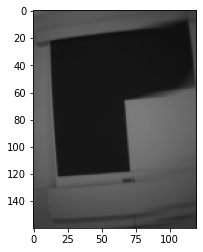

In [2]:
path0111_09 = '../ML/images/capture/train/0001/0001_0_436155.bmp'
img = image.load_img(path0111_09)
plt.imshow(img)

In [3]:
img0111_09 = cv2.imread(path0111_09)
img0111_09.shape

(160, 120, 3)

In [59]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
train_dataset = train.flow_from_directory('../ML/images/capture/train/', 
                                          target_size=(160, 120),
                                          batch_size=3)
validation_dataset = validation.flow_from_directory('../ML/images/capture/validation/', 
                                            target_size=(160, 120),
                                            batch_size=3)

Found 864 images belonging to 16 classes.
Found 197 images belonging to 16 classes.


In [45]:
train_dataset.class_indices
#validation_dataset.class_indices

{'0000': 0,
 '0001': 1,
 '0010': 2,
 '0011': 3,
 '0100': 4,
 '0101': 5,
 '0110': 6,
 '0111': 7,
 '1000': 8,
 '1001': 9,
 '1010': 10,
 '1011': 11,
 '1100': 12,
 '1101': 13,
 '1110': 14,
 '1111': 15}

In [60]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (160, 120, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (160, 120, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.15),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(16,activation='softmax')
                                   ])

In [69]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(lr=0.0001),
             metrics=['accuracy'])

In [70]:
model.fit(train_dataset,
          steps_per_epoch=5,
          epochs=20,
          validation_data=validation_dataset)

Epoch 1/20
5/5 [==============================] - 2s 301ms/step - loss: 2.5503 - accuracy: 0.2667 - val_loss: 2.7120 - val_accuracy: 0.1218
Epoch 2/20
5/5 [==============================] - 1s 262ms/step - loss: 2.5346 - accuracy: 0.2000 - val_loss: 2.5926 - val_accuracy: 0.2741
Epoch 3/20
5/5 [==============================] - 1s 266ms/step - loss: 2.3342 - accuracy: 0.3333 - val_loss: 2.5383 - val_accuracy: 0.2995
Epoch 4/20
5/5 [==============================] - 1s 267ms/step - loss: 2.2719 - accuracy: 0.2667 - val_loss: 2.3225 - val_accuracy: 0.4619
Epoch 5/20
5/5 [==============================] - 1s 265ms/step - loss: 1.9682 - accuracy: 0.4667 - val_loss: 2.3717 - val_accuracy: 0.4315
Epoch 6/20
5/5 [==============================] - 1s 265ms/step - loss: 2.2940 - accuracy: 0.4000 - val_loss: 2.1106 - val_accuracy: 0.4924
Epoch 7/20
5/5 [==============================] - 1s 267ms/step - loss: 2.2026 - accuracy: 0.4667 - val_loss: 1.9144 - val_accuracy: 0.5787
Epoch 8/20
5/5 [====

In [76]:
model.save('model_datacom_8')

INFO:tensorflow:Assets written to: model_datacom_8\assets


[9]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


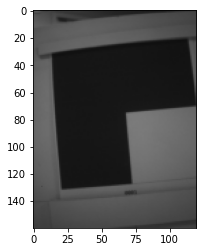

In [75]:
# test_path = '../ML/images/train/0101/0101__5.bmp'
test_path = '../Server/L.bmp'
test_img = image.load_img(test_path)
plt.imshow(test_img)
array_test_img = image.img_to_array(test_img)
array_test_img = np.expand_dims(array_test_img,axis=0)
target = np.vstack([array_test_img])
print(np.argmax(model.predict(target), axis=-1))
val = model.predict(target)
print(val[0])

[13]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [22]:
val[0]

array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       6.756126e-38, 0.000000e+00, 0.000000e+00, 1.000000e+00],
      dtype=float32)

In [23]:
model.predict_classes(target)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1], dtype=int64)

In [24]:
model.evaluate(validation_dataset)

64/64 [==============================] - 1s 13ms/step - loss: 0.0828 - accuracy: 1.0000


[0.08278270810842514, 1.0]

In [30]:
import tensorflow as tf
sess = tf.Session()

AttributeError: module 'tensorflow' has no attribute 'Session'